## BoT-IoT 데이터 로드



In [ ]:
# 구글 드라이브 마운트(접근 허용)

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 구글 드라이브에서 csv 파일 가져오기

import pandas as pd

# 불러올 파일의 경로를 filename 변수에 저장
filename = '/content/drive/MyDrive/Colab Notebooks/UNSW_2018_IoT_Botnet_Final_10_Best.csv'

# pandas read_csv로 불러오기
df = pd.read_csv(filename, sep=';')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# 데이터 형식
df.head()

,Unnamed: 0,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,0,1,tcp,192.168.100.147,49960,192.168.100.7,80,9,0.068909,75,0.000000,1,0.068909,96,14.511893,0.566862,0.137818,1,DoS,HTTP
1,1,2,arp,192.168.100.7,-1,192.168.100.147,-1,10,0.000000,2,0.000131,2,0.000131,1,0.000000,0.000000,0.000131,1,DoS,HTTP
2,2,3,tcp,192.168.100.147,49962,192.168.100.7,80,11,0.064494,75,0.000000,1,0.064494,96,15.505319,0.567549,0.128988,1,DoS,HTTP
3,3,4,tcp,192.168.100.147,49964,192.168.100.7,80,12,0.064189,75,0.000000,1,0.064189,96,15.578993,0.567570,0.128378,1,DoS,HTTP
4,4,5,tcp,192.168.100.147,49966,192.168.100.7,80,13,0.063887,75,0.000000,1,0.063887,96,15.652637,0.567630,0.127774,1,DoS,HTTP


In [ ]:
df.shape  # 3,668,522개의 데이터, 20개의 특성

(3668522, 20)

In [ ]:
## 각 컬럼별 데이터 수, 데이터 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3668522 entries, 0 to 3668521
Data columns (total 20 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   pkSeqID            int64  
 2   proto              object 
 3   saddr              object 
 4   sport              object 
 5   daddr              object 
 6   dport              object 
 7   seq                int64  
 8   stddev             float64
 9   N_IN_Conn_P_SrcIP  int64  
 10  min                float64
 11  state_number       int64  
 12  mean               float64
 13  N_IN_Conn_P_DstIP  int64  
 14  drate              float64
 15  srate              float64
 16  max                float64
 17  attack             int64  
 18  category           object 
 19  subcategory        object 
dtypes: float64(6), int64(7), object(7)
memory usage: 559.8+ MB


In [ ]:
## 결측치 존재 여부 확인 - 존재 X
df.isnull().sum()

Unnamed: 0           0
pkSeqID              0
proto                0
saddr                0
sport                0
daddr                0
dport                0
seq                  0
stddev               0
N_IN_Conn_P_SrcIP    0
min                  0
state_number         0
mean                 0
N_IN_Conn_P_DstIP    0
drate                0
srate                0
max                  0
attack               0
category             0
subcategory          0
dtype: int64

In [ ]:
## 수치형 변수 분포 확인
df.describe()

,Unnamed: 0,pkSeqID,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack
count,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06
mean,1.834260e+06,1.834262e+06,1.213204e+05,8.871499e-01,8.253848e+01,1.017540e+00,3.134390e+00,2.231063e+00,9.245168e+01,4.455046e-01,2.955111e+00,3.020015e+00,9.998700e-01
std,1.059011e+06,1.059011e+06,7.579428e+04,8.037139e-01,2.439739e+01,1.483688e+00,1.186971e+00,1.517728e+00,1.817643e+01,6.028863e+01,7.245425e+02,1.860877e+00,1.140212e-02
min,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.171302e+05,9.171312e+05,5.487600e+04,3.001900e-02,6.900000e+01,0.000000e+00,3.000000e+00,1.819670e-01,1.000000e+02,0.000000e+00,1.559700e-01,2.806072e-01,1.000000e+00
50%,1.834260e+06,1.834262e+06,1.177690e+05,7.938960e-01,1.000000e+02,0.000000e+00,4.000000e+00,2.690125e+00,1.000000e+02,0.000000e+00,2.837830e-01,4.009111e+00,1.000000e+00
75%,2.751391e+06,2.751392e+06,1.849300e+05,1.745296e+00,1.000000e+02,2.151138e+00,4.000000e+00,3.565203e+00,1.000000e+02,0.000000e+00,4.882010e-01,4.293582e+00,1.000000e+00
max,3.668521e+06,3.668522e+06,2.622120e+05,2.496763e+00,1.000000e+02,4.980471e+00,1.100000e+01,4.981882e+00,1.000000e+02,5.882353e+04,1.000000e+06,4.999999e+00,1.000000e+00


In [ ]:
## 타겟 종류 확인
df['category'].unique()

array(['DoS', 'DDoS', 'Normal', 'Reconnaissance', 'Theft'], dtype=object)

In [ ]:
## 속성과 클래스 분리

import numpy as np

data = df[['seq', 'stddev', 'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP', 'min', 'state_number', 'mean', 'drate', 'srate', 'max']].to_numpy() 
target = df['category'].to_numpy()  # category: 공격의 종류

In [ ]:
print(data.shape)  # 총 3,668,522개의 데이터, 10개의 특성

(3668522, 10)


In [ ]:
data

array([[9.0000000e+00, 6.8909000e-02, 9.6000000e+01, ..., 1.4511893e+01,
        5.6686200e-01, 1.3781800e-01],
       [1.0000000e+01, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.3100000e-04],
       [1.1000000e+01, 6.4494000e-02, 9.6000000e+01, ..., 1.5505319e+01,
        5.6754900e-01, 1.2898800e-01],
       ...,
       [8.4000000e+01, 0.0000000e+00, 1.9000000e+01, ..., 5.5665690e+00,
        4.5228370e+00, 2.8743020e+00],
       [8.5000000e+01, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 3.0000000e-06],
       [1.0000000e+01, 5.6000000e-05, 2.0000000e+00, ..., 8.2550000e-03,
        8.2550000e-03, 2.7200000e-04]])

In [ ]:
target

array(['DoS', 'DoS', 'DoS', ..., 'Theft', 'Theft', 'Theft'], dtype=object)

## 훈련셋, 테스트셋 나누기

In [ ]:
## 훈련셋 : 테스트셋 = 8 : 2

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42
)

In [ ]:
print("train_input: ", train_input.shape)
print("train_target: ", train_target.shape)
print("test_input: ", test_input.shape)
print("test_target: ", test_target.shape)

train_input:  (2934817, 10)
train_target:  (2934817,)
test_input:  (733705, 10)
test_target:  (733705,)


훈련셋: 2,934,817개의 데이터

테스트셋: 733,705개의 데이터

## 데이터 전처리

In [ ]:
## 최소 최대 정규화

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_input)

train_scaled = scaler.transform(train_input)
test_scaled = scaler.transform(test_input)

## Decision Tree 모델 훈련 및 평가

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996613417463508
0.9916301510825195


훈련셋과 테스트셋의 정확도가 둘 다 매우 높긴 하나, 훈련셋의 정확도가 조금 더 높다.

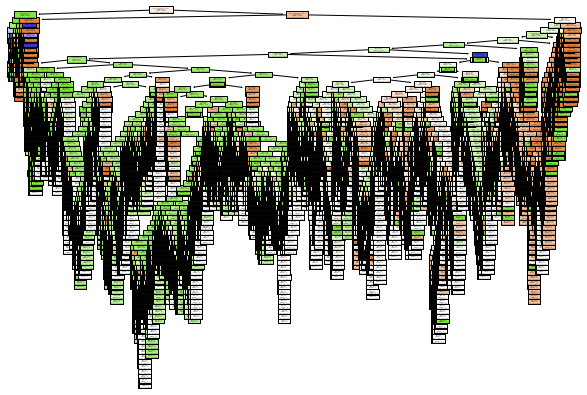

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 7))
plot_tree(dt, filled=True, feature_names=['seq', 'stddev', 'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP', 'min', 'state_number', 'mean', 'drate', 'srate', 'max'])
plt.savefig('full-tree.png')
plt.show()

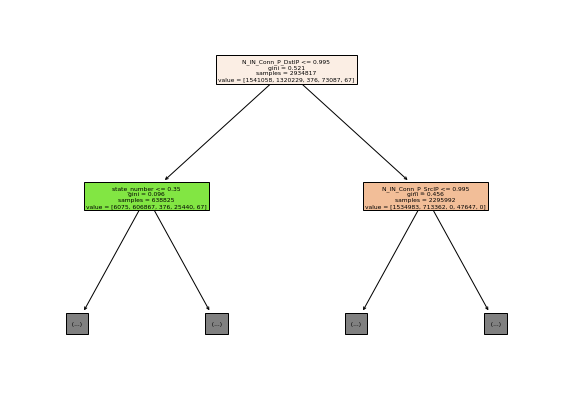

In [ ]:
plt.figure(figsize=(10, 7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['seq', 'stddev', 'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP', 'min', 'state_number', 'mean', 'drate', 'srate', 'max'])
plt.savefig('depth-1-tree.png', dpi=200)
plt.show()

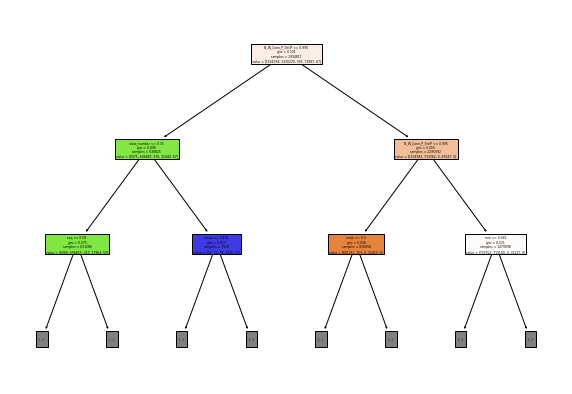

In [ ]:
plt.figure(figsize=(10, 7))
plot_tree(dt, max_depth=2, filled=True, feature_names=['seq', 'stddev', 'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP', 'min', 'state_number', 'mean', 'drate', 'srate', 'max'])
plt.savefig('depth-2-tree.png')
plt.show()

## 가지치기 수행

In [ ]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

## 표준화한 데이터셋 활용 (어차피 각 단계마다 같은 기준을 가지고 비교하기 때문에 표준화하지 않은 데이터셋과 결과 동일)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.7982528382519251
0.7987052016818749


결정 트리 학습 시 지나치게 많이 나누는 경우 과대적합이 발생할 수 있는데, 가지치기 수행 전에도 과대적합이 발생하지 않았으므로 이를 통해 끝까지 나눴을 때(높이 제한 X)가 적당한 높이였음을 알 수 있다. 따라서 높이를 제한하였을 때 오히려 성능이 낮게 나오는 것이다.

## 시각화

In [ ]:
## 각 요소별 중요도 출력
print(dt.feature_importances_)

[0.05829243 0.13945639 0.2813315  0.16443251 0.08199899 0.08593544
 0.08359074 0.00760661 0.0352271  0.06212829]


In [ ]:
print(train_scaled)

seq : 0.058
stddev : 0.139
N_IN_Conn_P_DstIP : 0.281
N_IN_Conn_P_SrcIP : 0.164
min : 0.082
state_number : 0.086
mean : 0.084
drate : 0.008
srate : 0.035
max : 0.062


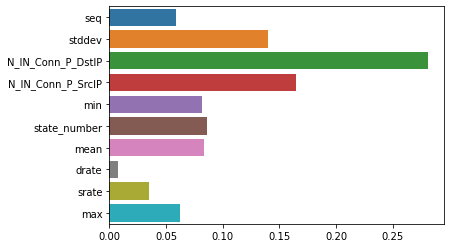

In [ ]:
## 특성 중요도 시각화

import seaborn as sns
import numpy as np
%matplotlib inline

data_df = df[['seq', 'stddev', 'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP', 'min', 'state_number', 'mean', 'drate', 'srate', 'max']]
feature_names = data_df.columns.tolist()

# feature별 importance 매핑
for name, value in zip(feature_names , dt.feature_importances_):
    print('{} : {:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=dt.feature_importances_, y=feature_names)
plt.savefig('feature_importances.png')

가장 중요도가 높은 특성은 N_IN_Conn_P_DstIP이며, 해당 특성은 Destination IP당 인바운드 연결 수를 의미한다. 다음으로 중요도가 높았던 특성은 N_INConn_P_SrcIP로, Source IP 당 인바운드 연결 수를 의미한다.

## 하이퍼파라미터 튜닝

In [38]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

# https://injo.tistory.com/15 참고
# min_samples_split: 노드를 분할하기 위한 최소한의 샘플 데이터 수
# min_samples_leaf: 리프노드가 되기 위한 최소한의 샘플 데이터 수
# max_features: 최적의 분할을 위해 고려할 최대 feature 개수
# max_depth: 트리의 최대 깊이
# min_impurity_decrease: 노드가 분할하는 데 필요한 불순도 변화의 최솟값

params = {'min_impurity_decrease': uniform(0.0001, 0.001),
          'max_depth': randint(1, 50),
          'min_samples_split': randint(2, 25),
          'min_samples_leaf': randint(1, 20),
          }

gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params, n_iter=10, random_state=42)

gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fdb45b5b0d0>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fdb4445a850>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fdb6330bdc0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fdb452b7490>},
                   random_state=42)

In [39]:
print(gs.best_params_)

{'max_depth': 22, 'min_impurity_decrease': 0.00010706630521971741, 'min_samples_leaf': 17, 'min_samples_split': 11}


In [42]:
dt = gs.best_estimator_

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.9946514552696131
0.9945877430302369


그리드서치로 최적의 모델 탐색 후 평가했을 때, 이미 성능이 좋았던 모델이라 큰 차이는 없었다. 그러나 훈련셋과 테스트셋의 평가 결과 값의 차이가 줄어들었고, 테스트셋 평가의 경우 정확도가 이전보다 0.003 정도 증가하였으므로 모델이 더욱 잘 만들어졌다고 볼 수 있다.

seq : 0.052
stddev : 0.045
N_IN_Conn_P_DstIP : 0.281
N_IN_Conn_P_SrcIP : 0.166
min : 0.012
state_number : 0.082
mean : 0.094
drate : 0.007
srate : 0.238
max : 0.023


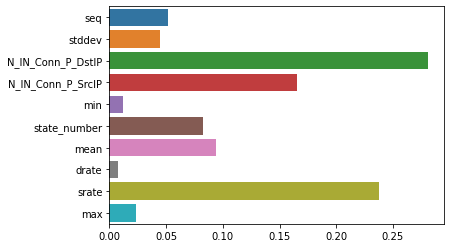

In [41]:
## 특성 중요도 시각화

import seaborn as sns
import numpy as np
%matplotlib inline

data_df = df[['seq', 'stddev', 'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP', 'min', 'state_number', 'mean', 'drate', 'srate', 'max']]
feature_names = data_df.columns.tolist()

# feature별 importance 매핑
for name, value in zip(feature_names , dt.feature_importances_):
    print('{} : {:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=dt.feature_importances_, y=feature_names)
plt.savefig('feature_importances_tuning.png')

하이퍼파라미터 튜닝 후, srate의 중요도가 눈에 띄게 커졌다. srate는 초당 source에서 destination으로 간 패킷의 수를 의미한다. 아무런 파라미터를 주지 않고 훈련했던 결정 트리보다는 랜덤 서치를 통해 훈련시킨 모델의 신뢰성이 더 높기 때문에, 각 공격을 분류하는데 중요했던 특성은 N_IN_Conn_P_DstIP, srate, N_IN_Conn_P_SrcIP 순이라고 판단하는 것이 더욱 합리적일 것이다. 

## DDoS Botnet Attack Dataset으로 예측해보기

In [44]:
# 구글 드라이브에서 csv 파일 가져오기

import pandas as pd

# 불러올 파일의 경로를 filename 변수에 저장
filename = '/content/drive/MyDrive/Colab Notebooks/DDoSdata.csv'

# pandas read_csv로 불러오기
ddos = pd.read_csv(filename)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (8,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [45]:
ddos.head()

,Unnamed: 0,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,1650261,1650261,1.528103e+09,e,1,tcp,1,192.168.100.150,54110,192.168.100.3,...,1.21662,40,38,1.56093,1.21662,328,308,1,DDoS,HTTP
1,1650262,1650262,1.528103e+09,e,1,tcp,1,192.168.100.150,54112,192.168.100.3,...,1.21662,40,38,1.56107,1.21662,328,308,1,DDoS,HTTP
2,1650263,1650263,1.528103e+09,e,1,tcp,1,192.168.100.150,54114,192.168.100.3,...,1.21662,40,38,1.24980,1.21662,328,308,1,DDoS,HTTP
3,1650264,1650264,1.528103e+09,e,1,tcp,1,192.168.100.150,54116,192.168.100.3,...,1.21662,40,38,1.24986,1.21662,328,308,1,DDoS,HTTP
4,1650265,1650265,1.528103e+09,e,1,tcp,1,192.168.100.150,54118,192.168.100.3,...,1.21662,40,38,1.24991,1.21662,328,308,1,DDoS,HTTP


In [46]:
ddos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1927101 entries, 0 to 1927100
Data columns (total 47 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Unnamed: 0                        int64  
 1   pkSeqID                           int64  
 2   stime                             float64
 3   flgs                              object 
 4   flgs_number                       int64  
 5   proto                             object 
 6   proto_number                      int64  
 7   saddr                             object 
 8   sport                             object 
 9   daddr                             object 
 10  dport                             object 
 11  pkts                              int64  
 12  bytes                             int64  
 13  state                             object 
 14  state_number                      int64  
 15  ltime                             float64
 16  seq                               in

In [47]:
## 타겟 종류 확인
ddos['category'].unique()

array(['DDoS', 'Normal'], dtype=object)

ddos에는 DDoS, Normal 트래픽만 포함되어 있다.

In [48]:
## 속성과 클래스 분리

import numpy as np

ddos_data = ddos[['seq', 'stddev', 'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP', 'min', 'state_number', 'mean', 'drate', 'srate', 'max']].to_numpy()  # 특성 논문 참고하여 임의로 선택, 후에 이유 덧붙여서 얘기하기
ddos_target = ddos['category'].to_numpy()  # category: 공격의 종류

In [49]:
ddos_data

array([[2.000000e+01, 5.441260e-01, 4.000000e+01, ..., 4.682800e-01,
        7.804670e-01, 1.223599e+00],
       [2.100000e+01, 5.441970e-01, 4.000000e+01, ..., 4.683220e-01,
        7.805360e-01, 1.223769e+00],
       [2.200000e+01, 1.110847e+00, 4.000000e+01, ..., 9.002140e-01,
        6.248990e-01, 2.221694e+00],
       ...,
       [3.815000e+03, 0.000000e+00, 1.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 2.778960e-01],
       [3.816000e+03, 0.000000e+00, 2.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 2.807420e-01],
       [3.817000e+03, 0.000000e+00, 2.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 2.805130e-01]])

In [50]:
ddos_data.shape

(1927101, 10)

In [51]:
ddos_target

array(['DDoS', 'DDoS', 'DDoS', ..., 'Normal', 'Normal', 'Normal'],
      dtype=object)

In [52]:
print(dt.score(ddos_data, ddos_target))

0.9927279369373998


훈련한 결정 트리 모델에 DDoS, Normal 트래픽만 넣어서 테스트해보았다. 0.99 정도로 높은 정확도가 나온 것을 보아 모델의 학습이 잘 이루어졌다고 판단할 수 있다. 이 모델을 활용하면 추후 DDoS 트래픽의 탐지가 가능할 것이다.